# LAB01

## Auther: Anand Kumar Dubey
23122005 3MSCDSA




## Predicting California Housing Prices

## Overview
This project aims to predict housing prices in California using a Linear Regression model. We explore the California Housing dataset, perform exploratory data analysis (EDA), preprocess the data, build and evaluate a Linear Regression model, and tune its hyperparameters to optimize performance.

## Dataset
The California Housing dataset includes various metrics such as median income, housing median age, average room numbers, average bedroom numbers, population, average occupancy, latitude, and longitude of block groups in California.

## File Description
- **lab01.ipynb**: Jupyter Notebook containing the code implementation.
- **lab01.html**: HTML export of the Jupyter Notebook.
- **lab01.pdf**: PDF export of the Jupyter Notebook.
- **README.md**: Overview of the project.

## Usage
1. Cloned the repository:

```
git clone https://github.com/a-4anand/ML_Naived_LAb

```

2. Installed the required libraries:

```

```

3. Run the Jupyter Notebook:

```
jupyter notebook lab01.ipynb
```

4. Followed the instructions in the notebook to execute each code cell.

## Libraries Used
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Scikit-learn

## Conclusion
 
Based on the comprehensive analysis conducted through multiple plots and graphs, a clearer understanding of the relationship between various factors and house prices in California has emerged. Utilizing linear regression models, we scrutinized the impact of different variables on the housing market.

Our findings indicate that two key factors significantly influence house prices in California: the average income of the population in a particular area and the proximity to the ocean (distance from the coast). While other factors also contribute to variations in house prices, it is noteworthy that the mean squared error (MSE) for ocean proximity and median income is the lowest among all factors examined. This suggests that these variables play a predominant role in shaping the housing market in California.

Furthermore, our analysis, reinforced by scatter maps, reveals a distinct trend: houses located near coastal areas command higher prices compared to those farther inland. This aligns with the broader understanding that proximity to desirable amenities, such as the ocean, significantly influences property values.

In conclusion, our examination underscores the importance of considering median income and ocean proximity as primary determinants of house prices in California. These insights offer valuable guidance for policymakers, real estate professionals, and individuals navigating the housing market landscape in the state of California, USA.

importing important libraries

In [58]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Loading and cleaning th dataset

In [60]:
df= pd.read_csv("housing.csv")

In [61]:
print(df.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [62]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


the dataset is having 10 columns which describe the meand median od income and house price and the location of the houses

## Data Cleaning

In [63]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [64]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [65]:
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [66]:
print(df["total_bedrooms"])

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64


In [67]:
# print(df.info())

In [68]:
print(df["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [69]:
df["ocean_proximity"]=df["ocean_proximity"].map({'NEAR BAY':0,'<1H OCEAN':3,'INLAND':4,'NEAR OCEAN':2,'ISLAND':1})

In [70]:
df['ocean_proximity'] = df['ocean_proximity'].astype(float)


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB
None


## Visualization

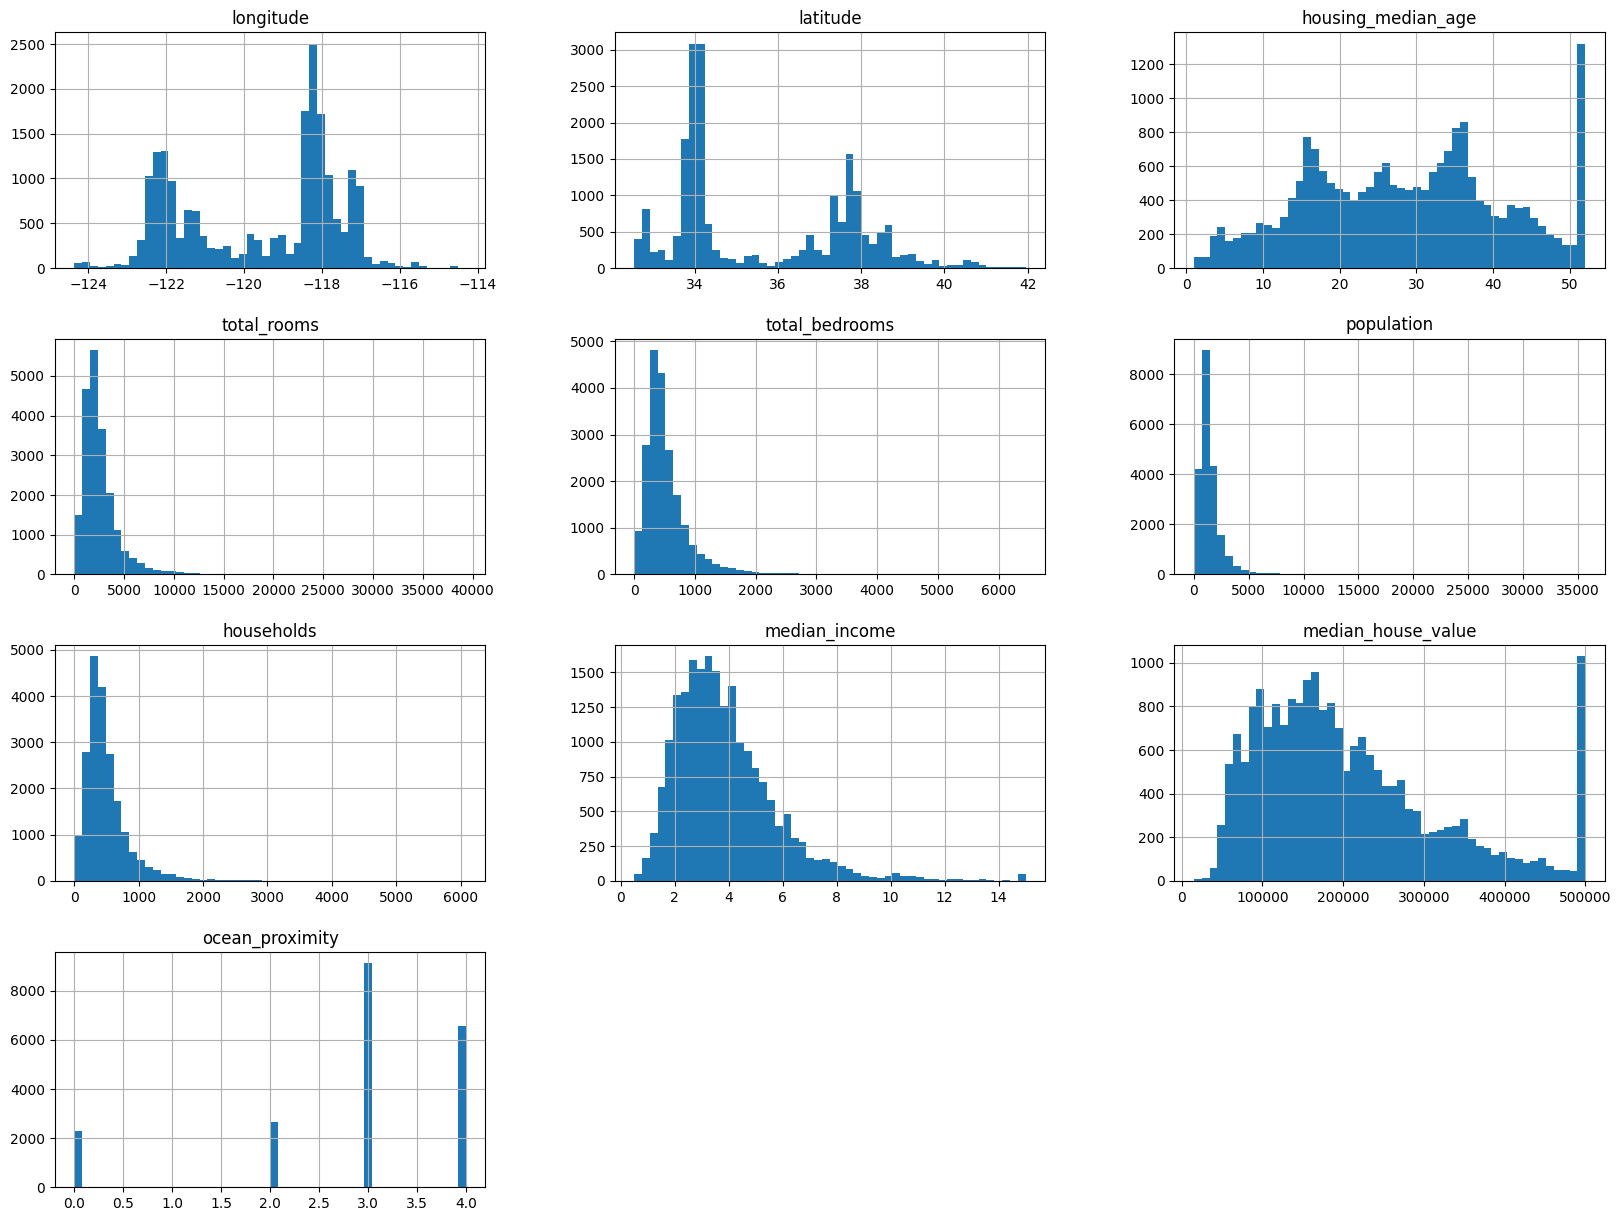

In [72]:
df.hist(bins=50, figsize=(20,15))
plt.show()

From the above hsitogram we can observe that most of the houses are over 50 years old,where median income of the most people range between 2-4 us dollor, and median hoes value do differ a lot but in most case it range between 100000-200000 , that shows the distribution of economy and teh affect of teh same on the House prices across california, where we can see if teh house is very near to teh ocean ie 0.5 teh teh price is not too much but for 1.0 it is teh heighest, taht shows the peopl's interest while buying a house in callifornia.

Median House Value by Location

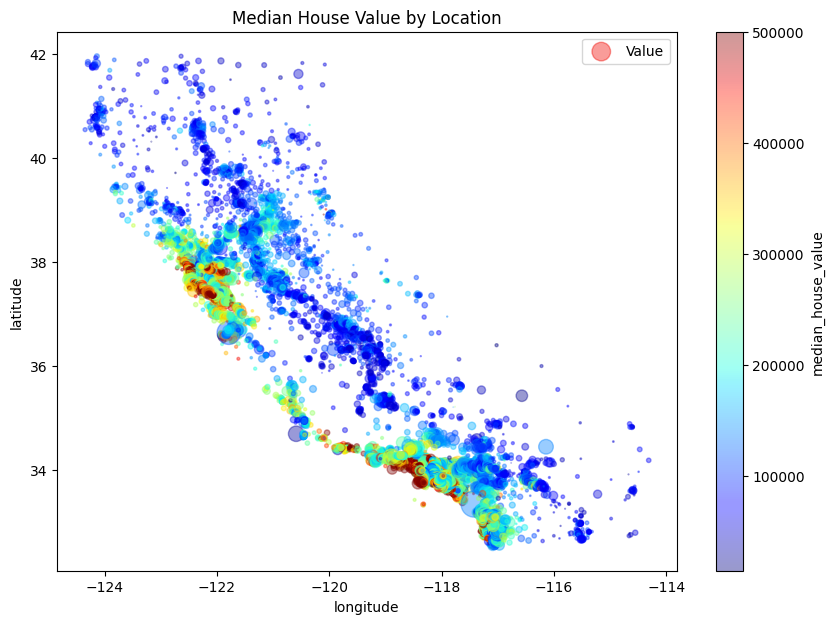

In [73]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="Value", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("Median House Value by Location")
plt.legend()
plt.show()

Upon analyzing the provided histogram, it becomes apparent that the distribution of house prices varies across different regions. While there are areas where house prices demonstrate relative consistency, such as (34,-118) and (38,-122), these locations do not necessarily represent a statewide trend. Notably, coastal regions tend to exhibit higher house prices compared to inland areas. Hence, it is observable that house prices in coastal regions of California are generally higher than in other areas

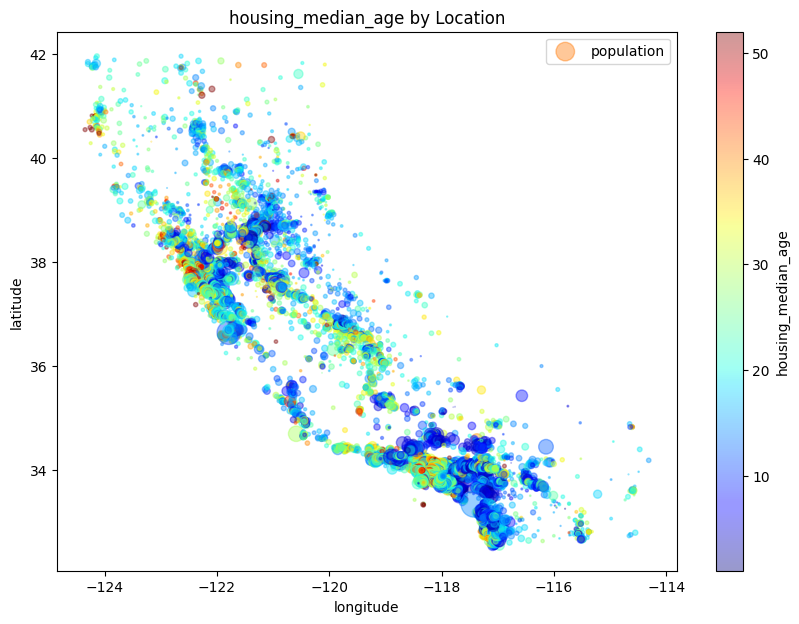

In [74]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="housing_median_age", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("housing_median_age by Location")
plt.legend()
plt.show()

Upon thorough analysis of the provided histogram, it becomes evident that the distribution of house prices exhibits notable variations across diverse regions. While certain areas, exemplified by coordinates (34,-118) and (38,-122), display a degree of price stability, it's imperative to note that these locales do not uniformly signify a statewide pattern. Particularly noteworthy is the tendency for coastal regions to command higher house prices in comparison to inland areas. Thus, it is discernible that house prices in California's coastal regions generally surpass those in other geographic areas.

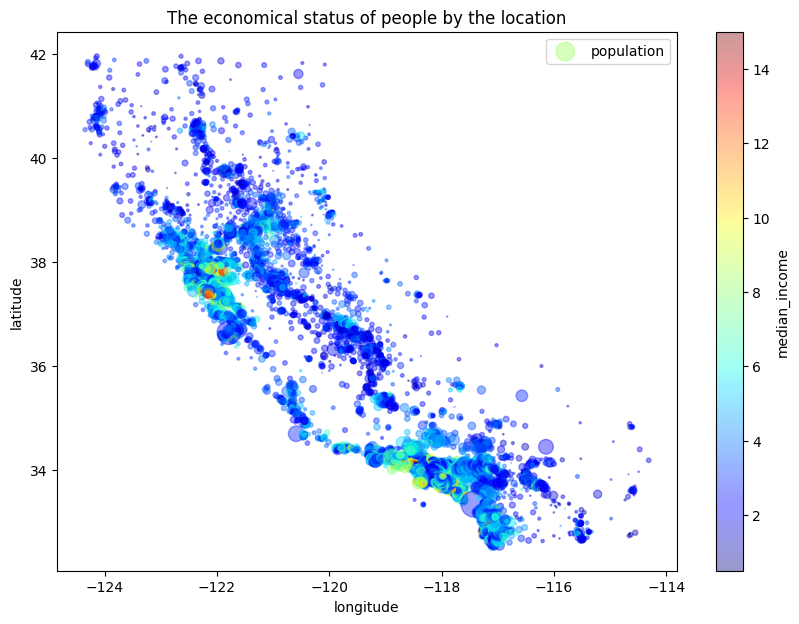

In [75]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_income", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("The economical status of people by the location")
plt.legend()
plt.show()

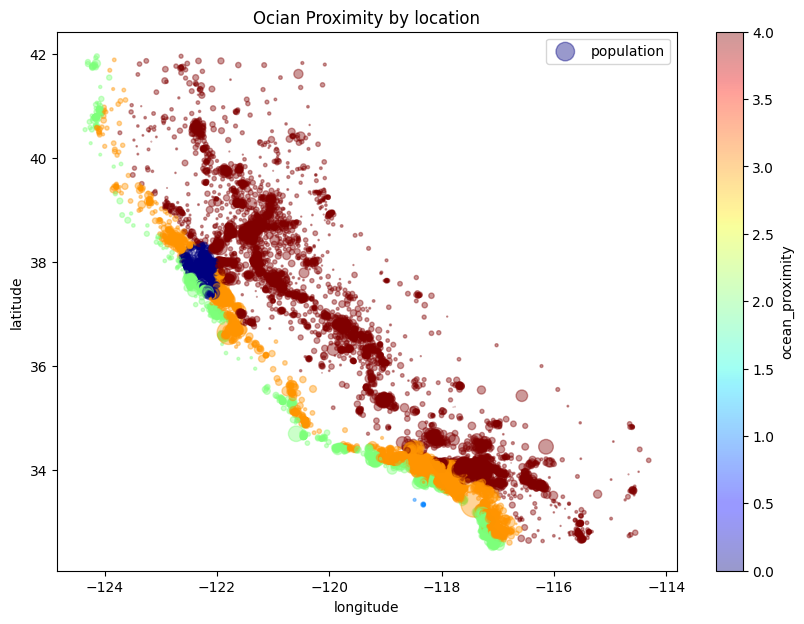

In [76]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="ocean_proximity", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("Ocian Proximity by location")
plt.legend()
plt.show()

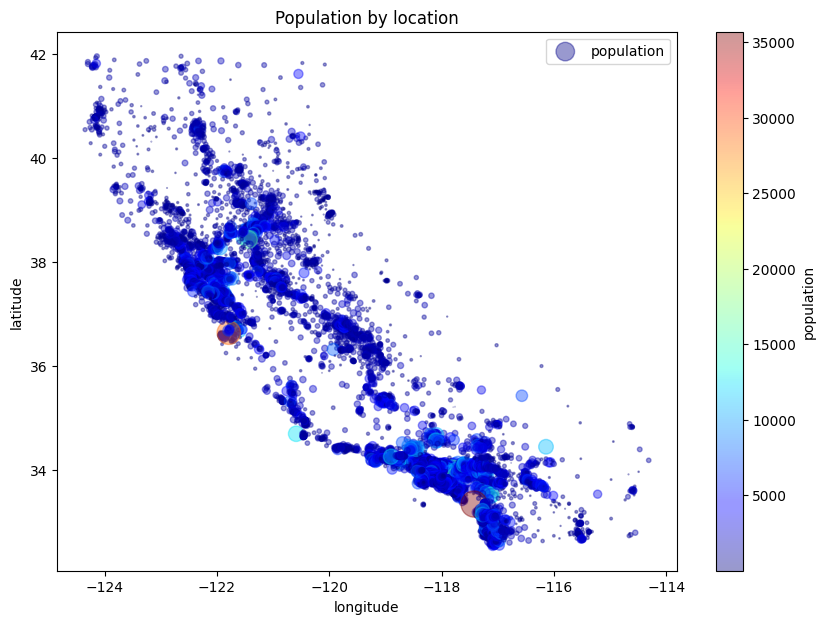

In [77]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="population", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("Population by location")
plt.legend()
plt.show()

<Axes: >

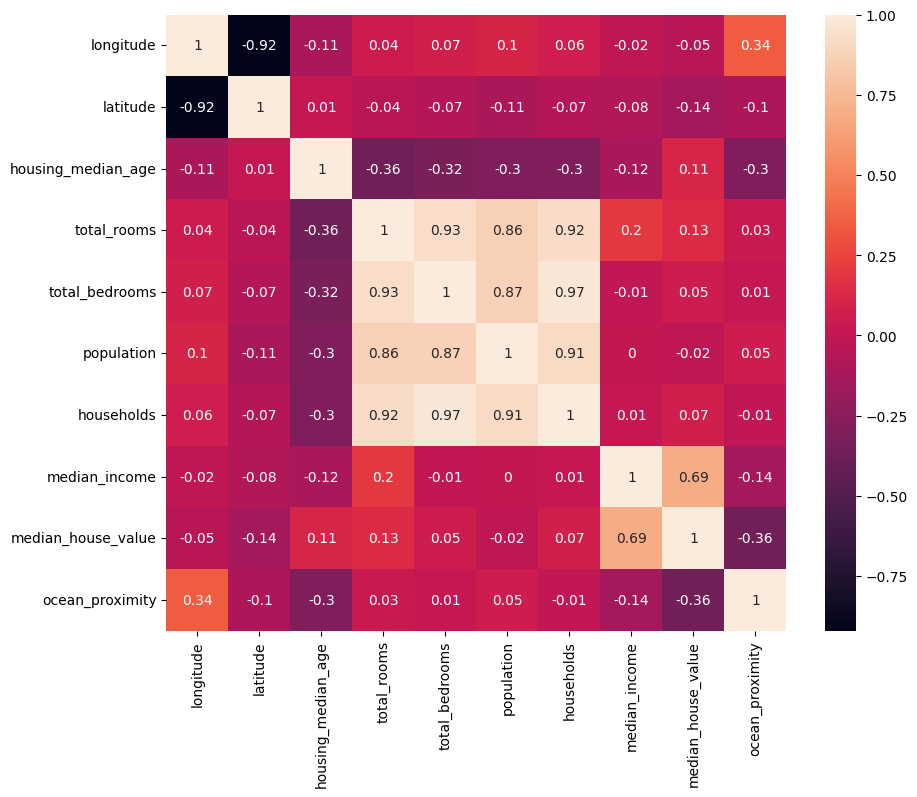

In [78]:

corr_matrix = df.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True)

## Creating a linear regression model for the prediction of house prices

In [79]:
features=df.drop('median_house_value',axis=1)

In [80]:
X =features



In [81]:
y=df['median_house_value']

In [83]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
model=LinearRegression()

In [85]:
model.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred=model.predict(X_test)

Evolution

In [87]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)

In [88]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 69534.09062759073
R² Score: 0.6383102509627363


## Building model for the different paramenter  

1. Considering total number of the rooms in house as the model's parameter

In [89]:
X=df[['total_rooms']]

In [90]:
y=df['median_house_value']

In [91]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
model=LinearRegression()

In [93]:
model.fit(X_train,y_train)

LinearRegression()

In [94]:
y_pred=model.predict(X_test)

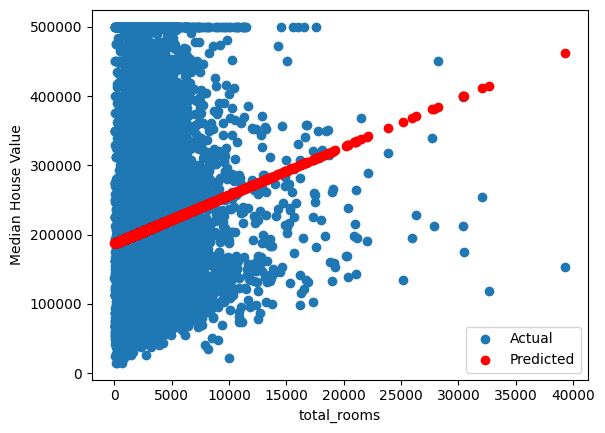

In [95]:

# Visualize the results
plt.scatter(X_test['total_rooms'], y_test, label='Actual')
plt.scatter(X_test['total_rooms'], y_pred, color='red', label='Predicted')
plt.xlabel('total_rooms')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

Evolution

In [96]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)

In [97]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 114586.50989342446
R² Score: 0.01778259596408338


2. considering house's age as a parameter

In [98]:
X=df[['housing_median_age']]
y=df['median_house_value']

X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

Evolution

In [99]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)

In [100]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 115015.95290147579
R² Score: 0.010406565190313688


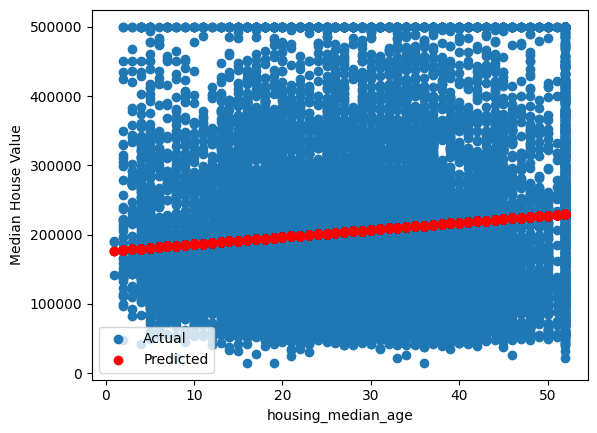

In [101]:

# Visualize the results
plt.scatter(X_test['housing_median_age'], y_test, label='Actual')
plt.scatter(X_test['housing_median_age'], y_pred, color='red', label='Predicted')
plt.xlabel('housing_median_age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()


3. Considering Ocean proximity as a parameter

In [102]:
X=df[['ocean_proximity']]
y=df['median_house_value']

X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

Evolution

In [103]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)

In [104]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 108161.81517660427
R² Score: 0.12483775101050532


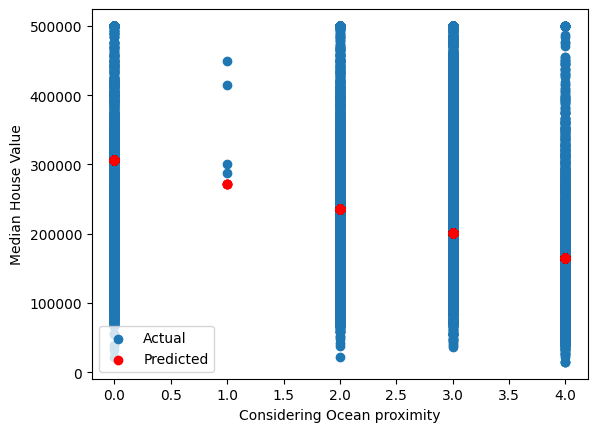

In [105]:
# Visualize the results
plt.scatter(X_test['ocean_proximity'], y_test, label='Actual')
plt.scatter(X_test['ocean_proximity'], y_pred, color='red', label='Predicted')
plt.xlabel('Considering Ocean proximity')
plt.ylabel('Median House Value')
plt.legend()
plt.show()


4.considering income as a factore

In [106]:
X=df[['median_income']]
y=df['median_house_value']

X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

Evolution

In [107]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
r2=r2_score(y_test,y_pred)

In [108]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 83626.65628947107
R² Score: 0.4768453300270462


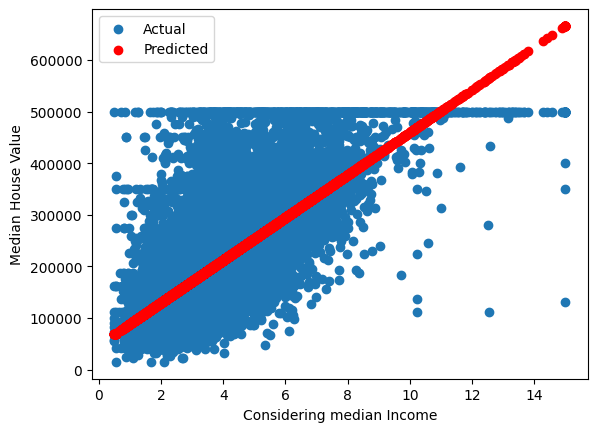

In [109]:
# Visualize the results
plt.scatter(X_test['median_income'], y_test, label='Actual')
plt.scatter(X_test['median_income'], y_pred, color='red', label='Predicted')
plt.xlabel('Considering median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

After thoroughly examining the data from our linear regression models and analyzing the mean squared error (MSE) for each parameter, a fascinating pattern emerges. It's quite striking that both median income and ocean proximity consistently show the lowest MSE values, indicating their strong influence on house prices across California.

Digging into the numbers, it's clear that areas with higher median incomes or those closer to the ocean tend to have higher house prices. This aligns with our intuition - affluent neighborhoods and coastal properties are often in high demand, leading to higher prices.

Conversely, regions with lower median incomes or farther from the ocean tend to have more affordable housing options. It seems that factors like purchasing power and proximity to desirable amenities play a significant role in determining house prices.

Understanding these dynamics is crucial for making informed decisions about housing policies and urban development. By recognizing the impact of median income and ocean proximity on housing markets, we can better address issues of affordability and promote equitable access to housing across California.